In [1]:
# A continuación importaremos varias bibliotecas que se utilizarán:

# Biblioteca para trabajar con JSON
import json

import pandas as pd
# Biblioteca con métodos numéricos y representaciones matriciales
import numpy as np
# Biblioteca para construir un modelo basado en la técnica Gradient Boosting
import xgboost as xgb
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
import collections
from sklearn.model_selection import train_test_split
# Método para crear modelos basados en árboles de decisión
from sklearn.tree import DecisionTreeClassifier
# Clase para crear una pipeline de machine-learning
from sklearn.pipeline import Pipeline
# Paquetes scikit-learn para evaluación de modelos
# Métodos para la validación cruzada del modelo creado
from sklearn.model_selection import KFold, cross_validate
from IPython.display import display # display from IPython.display
import itertools

In C:\Users\David\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\David\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\David\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\David\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed tw

# Abriendo la base de datos

In [2]:
df_study = pd.read_csv(r'DB.csv',header=1)
df_study.head()

,longitud x,longitud y,Numero de varillas x,Numero de varillas y,f'c,B,Fy,X,Y,X.1,Y.1,X.2,Y.2
0,0.20,0.25,3,4,210,0.85,4200,0,302.19,13.62,11.91,13.24,0
1,0.25,0.25,3,4,210,0.85,4200,0,324.50,1429.00,20.72,13.62,0
2,0.30,0.25,3,4,210,0.85,4200,0,346.82,14.96,29.53,13.98,0
3,0.35,0.25,3,4,210,0.85,4200,0,369.13,15.62,38.33,14.34,0
4,0.40,0.25,3,4,210,0.85,4200,0,391.44,16.29,47.14,14.68,0


#### Cambiando el nombre de las columnas y mostrando el comportamiento estadistico de los datos numéricos
* Las variables objetivos o dependientes son
    * X_cp
    * Y_cp
    * X_fb
    * Y_fb
    * Y
    * X

In [3]:
columns_num = df_study.columns
columns_num = ['long_x', 'long_y', 'n_bar_x',
       'n_bar_y', 'fc', 'B', 'Fy', 'X_cp', 'Y_cp', 'X_fb', 'Y_fb', 'X',
       'Y']
df_study.columns = columns_num
df_study.describe()

,long_x,long_y,n_bar_x,n_bar_y,fc,B,Fy,X_cp,Y_cp,X_fb,Y_fb,X,Y
count,144.00000,144.000000,144.0,144.0,144.000000,1.440000e+02,144.0,144.0,144.000000,144.000000,144.000000,144.000000,144.0
mean,0.40000,0.425000,3.0,4.0,245.000000,8.500000e-01,4200.0,0.0,566.965208,56.841597,152.361528,34.387847,0.0
std,0.12955,0.114964,0.0,0.0,35.122164,1.114098e-16,0.0,0.0,162.246423,117.194958,80.707376,12.600351,0.0
min,0.20000,0.250000,3.0,4.0,210.000000,8.500000e-01,4200.0,0.0,302.190000,13.620000,11.910000,13.240000,0.0
25%,0.30000,0.337500,3.0,4.0,210.000000,8.500000e-01,4200.0,0.0,447.220000,28.825000,92.625000,23.435000,0.0
50%,0.40000,0.425000,3.0,4.0,245.000000,8.500000e-01,4200.0,0.0,534.240000,44.795000,141.065000,34.145000,0.0
75%,0.50000,0.512500,3.0,4.0,280.000000,8.500000e-01,4200.0,0.0,662.165000,63.522500,202.802500,44.607500,0.0
max,0.60000,0.600000,3.0,4.0,280.000000,8.500000e-01,4200.0,0.0,1069.740000,1429.000000,394.860000,54.550000,0.0


In [4]:
df_study.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 13 columns):
long_x     144 non-null float64
long_y     144 non-null float64
n_bar_x    144 non-null int64
n_bar_y    144 non-null int64
fc         144 non-null int64
B          144 non-null float64
Fy         144 non-null int64
X_cp       144 non-null int64
Y_cp       144 non-null float64
X_fb       144 non-null float64
Y_fb       144 non-null float64
X          144 non-null float64
Y          144 non-null int64
dtypes: float64(7), int64(6)
memory usage: 14.8 KB


#### Conteo de valores únicos por caracteristica
* Se observan columnas con valores únicos [n_bar_x,n_bar_y, B, Fy, X_cp, Y], los cuales serán eliminados posteriormente debido a su insignificancia estadistica.
* Se observa una columna con solo dos valores, la cual se interpretará como binaria para optimizar el análisis.

In [5]:
df_study.nunique()

long_x       9
long_y       8
n_bar_x      1
n_bar_y      1
fc           2
B            1
Fy           1
X_cp         1
Y_cp        64
X_fb       127
Y_fb       128
X          129
Y            1
dtype: int64

#### Valores nulos en la base de datos
* Sin valores nulos en la base de datos

In [6]:
print("Cantidad de datos: {}".format(len(df_study)))
df_study.isnull().sum()#.info()

Cantidad de datos: 144


long_x     0
long_y     0
n_bar_x    0
n_bar_y    0
fc         0
B          0
Fy         0
X_cp       0
Y_cp       0
X_fb       0
Y_fb       0
X          0
Y          0
dtype: int64

# EDA
* Visualizar el comportamiento de las caracteristicas, distribución
* Corr matrix en relación con la variable a objetivo

    * Se observa que algunas caracteristicas tienen distribución uniforme Lonf_x, Long_y
    * Las variables de salida dependientes poseen un aceptable distribución normalizada. Y_cp y Y_fb
    * La Variable de salida dependiente X_fb posee un valor outlier que dista mucho de la distribución se procederá a eliminar o corregir dependiendo de sus variables  independientes.
    * La variable dependiente X, muestra un comportamiento proxima a una distribución uniforme.

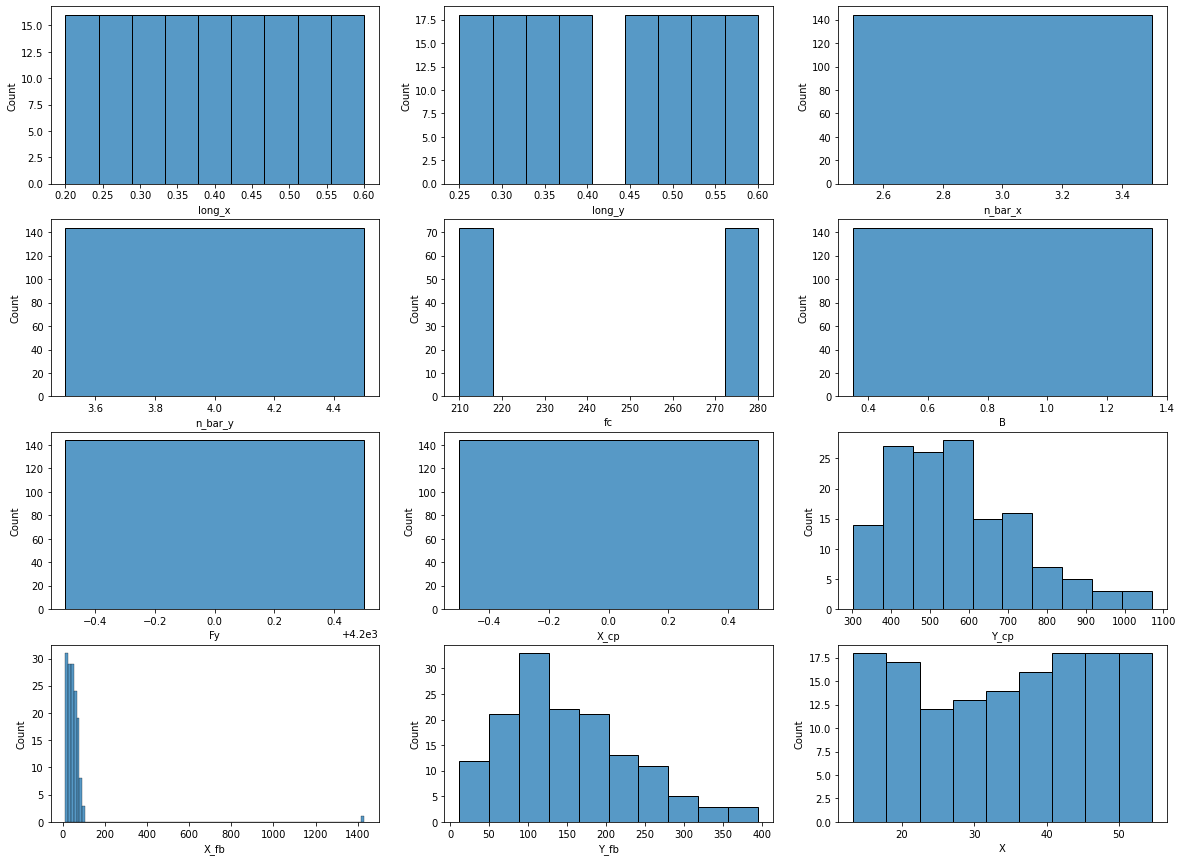

In [7]:
fig, axes = plt.subplots(nrows=round(len(columns_num)/3), ncols=3, figsize=(20, 15))
for ax, column in zip(axes.flatten(),columns_num):
    sns.histplot(df_study[column], ax=ax )

### Corrigiendo todas las observaciones

#### Eliminando las columnas invariantes

In [8]:
df_study_n = df_study.drop(columns = ['n_bar_x', 'n_bar_y'  ,'B','Fy', 'X_cp', 'Y'])
df_study_n.head()

,long_x,long_y,fc,Y_cp,X_fb,Y_fb,X
0,0.20,0.25,210,302.19,13.62,11.91,13.24
1,0.25,0.25,210,324.50,1429.00,20.72,13.62
2,0.30,0.25,210,346.82,14.96,29.53,13.98
3,0.35,0.25,210,369.13,15.62,38.33,14.34
4,0.40,0.25,210,391.44,16.29,47.14,14.68


#### Corrigiendo valor outlier

In [9]:
df_study_n.loc[df_study_n['X_fb']>1400]

,long_x,long_y,fc,Y_cp,X_fb,Y_fb,X
1,0.25,0.25,210,324.5,1429.0,20.72,13.62


###### Se observa un posible error en la coma decimal, se dividirá el valor entre 100

In [10]:
df_study_n.loc[df_study_n['long_x']==0.25].loc[df_study_n['long_y']==0.25]

,long_x,long_y,fc,Y_cp,X_fb,Y_fb,X
1,0.25,0.25,210,324.50,1429.0,20.72,13.62
73,0.25,0.25,280,361.69,15.4,35.40,14.22


In [11]:
df_study_n.loc[1, 'X_fb'] = df_study.loc[1].X_fb/100.0
df_study_n.loc[1, 'X_fb']

14.29

In [12]:
feature_columns = ['long_x', 'long_y', 'fc']
target_columns  = ['Y_cp', 'X_fb', 'Y_fb', 'X']

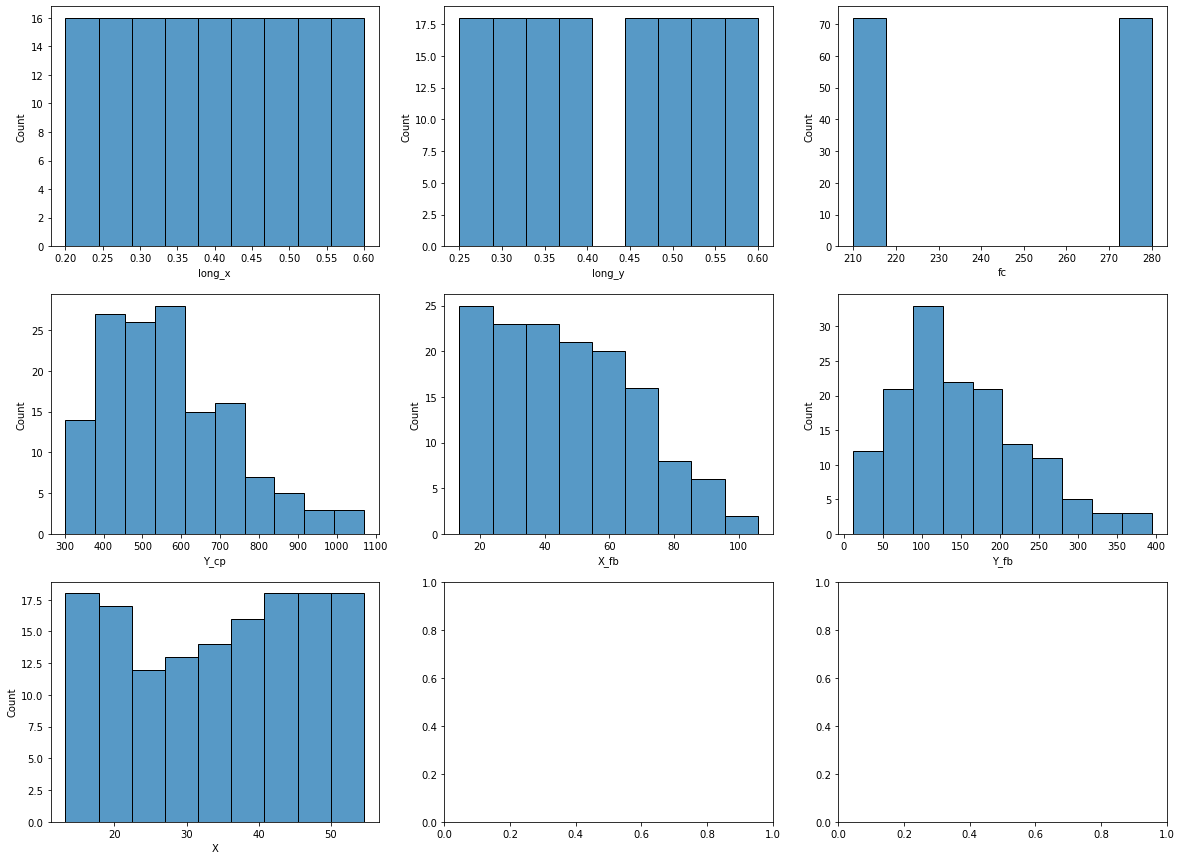

In [13]:
columns_num = df_study_n.columns
fig, axes = plt.subplots(nrows=round(len(columns_num)/3+1), ncols=3, figsize=(20, 15))
for ax, column in zip(axes.flatten(),columns_num):
    sns.histplot(df_study_n[column], ax=ax )

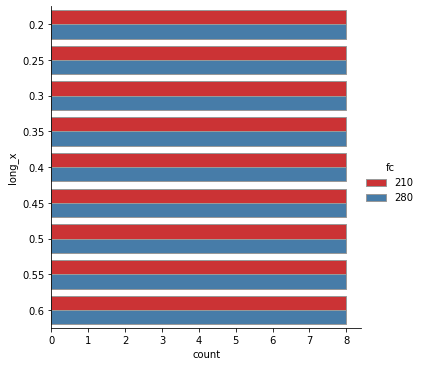

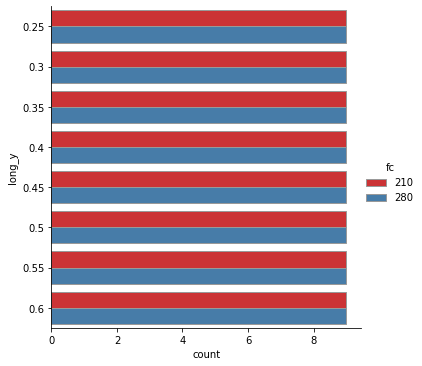

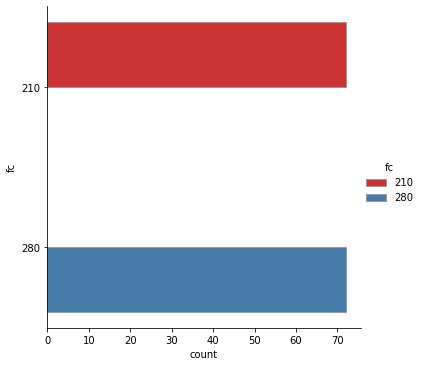

In [14]:
for column in feature_columns:
    sns.catplot(y=column, hue="fc", kind="count",
                palette="Set1", edgecolor=".6",
                data=df_study_n[feature_columns] )

## Corr Matrix

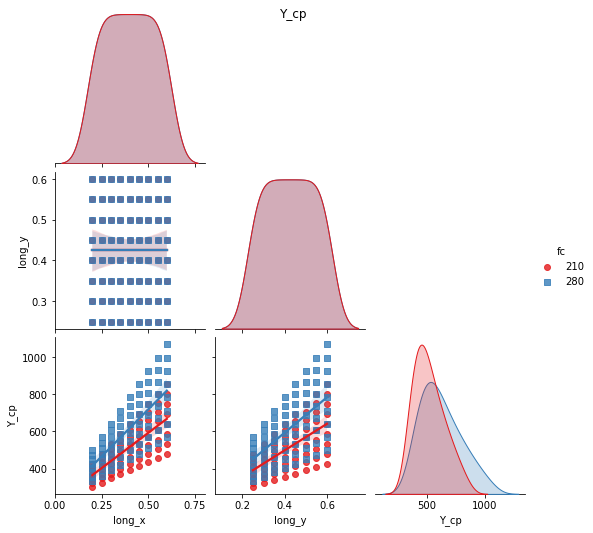

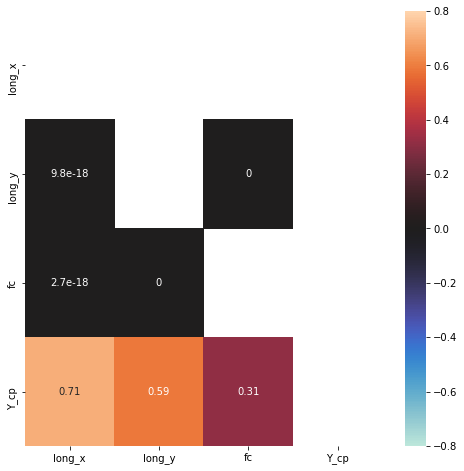

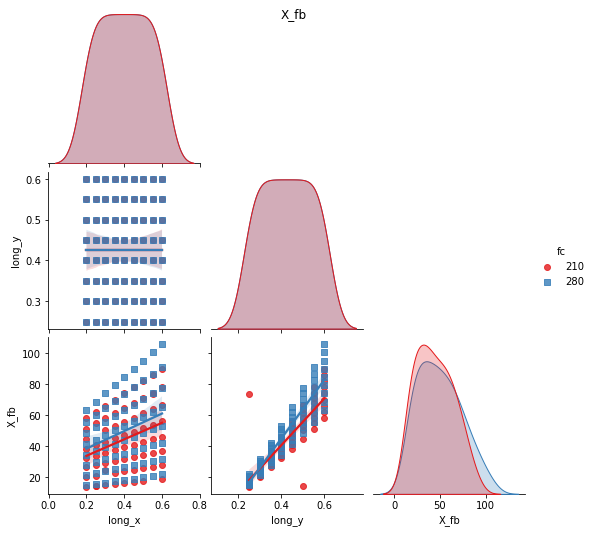

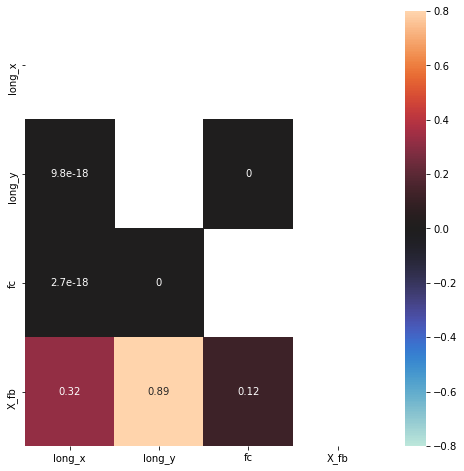

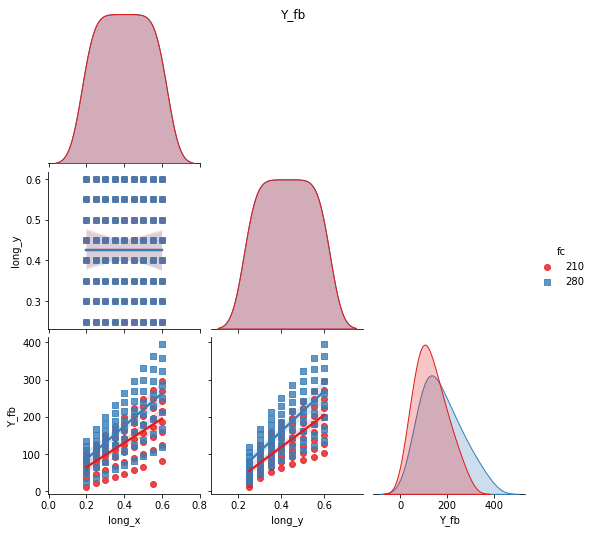

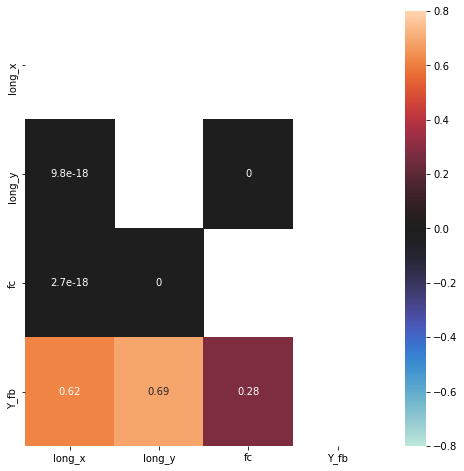

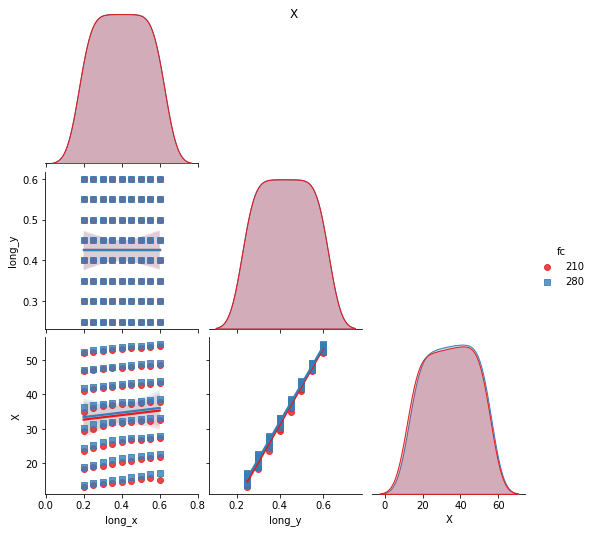

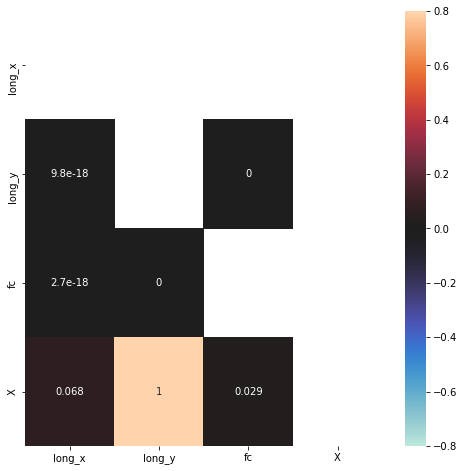

In [15]:
for output in target_columns:
    columns_cm = feature_columns.copy()
    columns_cm.append(output)
    sns_g = sns.pairplot(df_study_n[columns_cm], kind="reg", hue="fc", markers=["o", "s"], palette="Set1", corner=True) # TRACK_DH
    sns_g.fig.suptitle(output)
    plt.show()
    fig, ax = plt.subplots(figsize=(8,8))  
    corr_df = df_study_n[columns_cm].corr(method='pearson') 
    matrix = np.triu(corr_df)
    hmap=sns.heatmap(corr_df,annot=True, ax=ax, mask=matrix, vmin=-.8,vmax=.8, center=0)

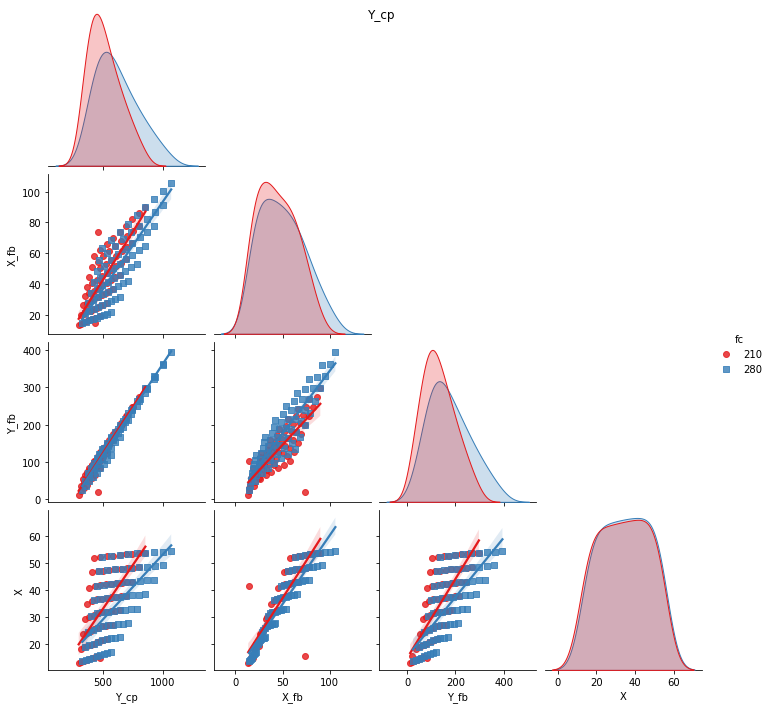

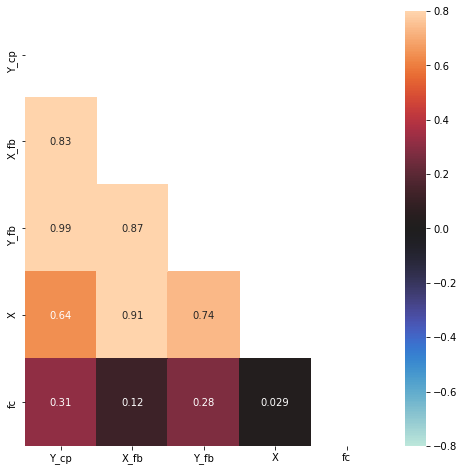

In [16]:
columns_cm = target_columns.copy()
columns_cm.append('fc')
sns_g = sns.pairplot(df_study_n[columns_cm], kind="reg", hue="fc", markers=["o", "s"], palette="Set1", corner=True) # TRACK_DH
sns_g.fig.suptitle(target_columns[0])
plt.show()
fig, ax = plt.subplots(figsize=(8,8))  
corr_df = df_study_n[columns_cm].corr(method='pearson') 
matrix = np.triu(corr_df)
hmap=sns.heatmap(corr_df,annot=True, ax=ax, mask=matrix, vmin=-.8,vmax=.8, center=0)

# Ingeniería de Caracteristicas
* Se aumentarán las caracteristicas, generanfo una interaccion entre x y Y, 
    * Se probo con una relacion cuadrática y cúbica
    * Los mejores resultados se obtubieron al combinar estas dos
            XY y XY2 y X2Y

In [17]:
def add_new_features(data):
    data = data.copy()
    def improve_feat(x):
        xy   = x['long_x']*x['long_y']
        #x2   = x['long_x']**2
        #y2   = x['long_y']**2
        xy2  = x['long_x']*x['long_y']**2
        x2y  = (x['long_x']**2)*x['long_y']
   
        
        return pd.Series([ xy, xy2,x2y   ],
                         index = [ 'xy','xy2','x2y' ])

    return data.join(data.apply(improve_feat, axis=1))

In [18]:
df_study_mod = add_new_features(df_study_n.copy())
df_study_mod.head()

,long_x,long_y,fc,Y_cp,X_fb,Y_fb,X,xy,xy2,x2y
0,0.20,0.25,210,302.19,13.62,11.91,13.24,0.0500,0.012500,0.010000
1,0.25,0.25,210,324.50,14.29,20.72,13.62,0.0625,0.015625,0.015625
2,0.30,0.25,210,346.82,14.96,29.53,13.98,0.0750,0.018750,0.022500
3,0.35,0.25,210,369.13,15.62,38.33,14.34,0.0875,0.021875,0.030625
4,0.40,0.25,210,391.44,16.29,47.14,14.68,0.1000,0.025000,0.040000


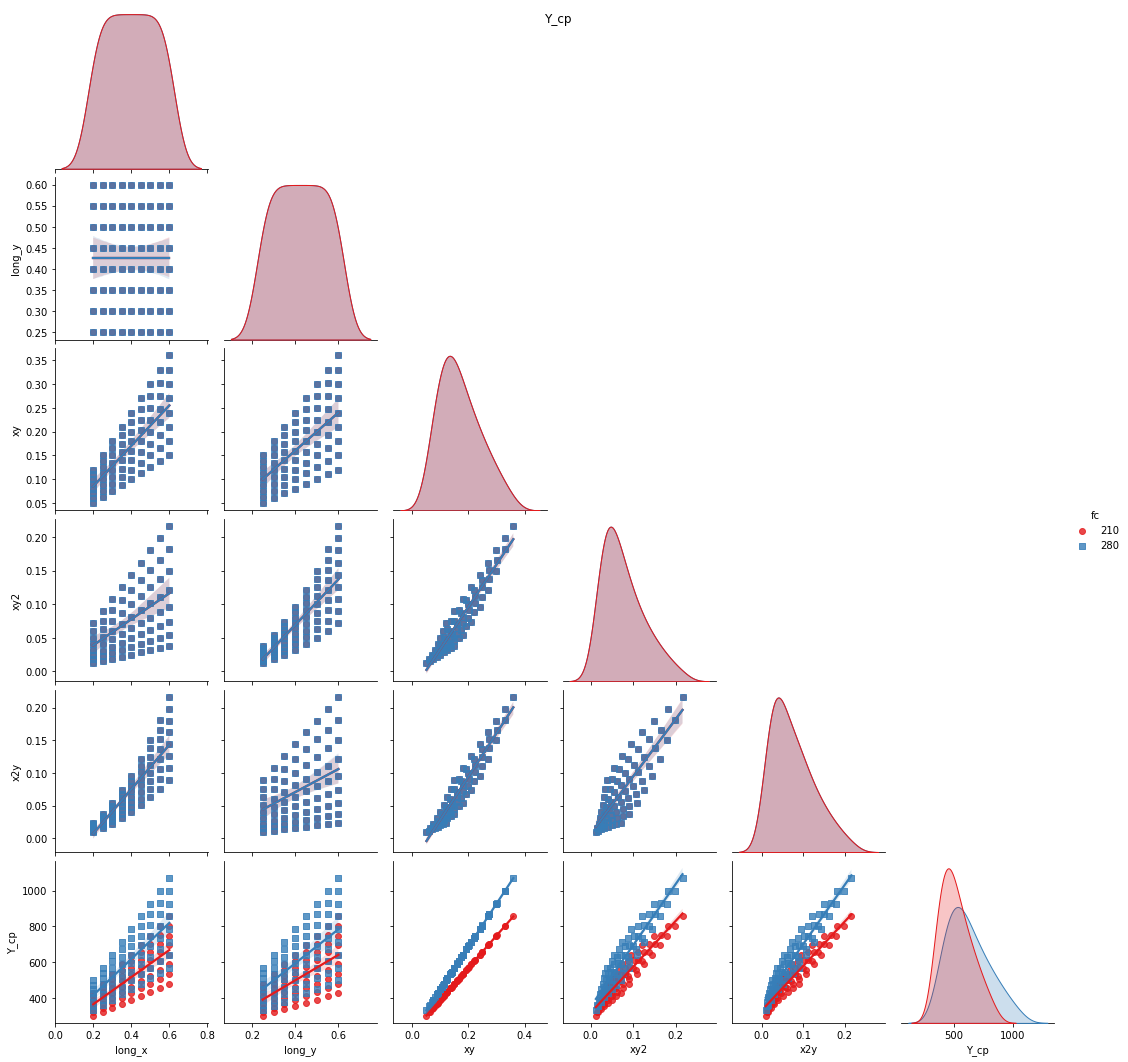

In [ ]:
feature_add_clm = ['long_x', 'long_y', 'fc', 'xy','xy2','x2y']
for output in target_columns:
    columns_cm = feature_add_clm.copy()
    columns_cm.append(output)
    sns_g = sns.pairplot(df_study_mod[columns_cm], kind="reg", hue="fc", markers=["o", "s"], palette="Set1", corner=True) # TRACK_DH
    sns_g.fig.suptitle(output)
    plt.show()
    fig, ax = plt.subplots(figsize=(8,8))  
    corr_df = df_study_mod[columns_cm].corr(method='pearson') 
    matrix = np.triu(corr_df)
    hmap=sns.heatmap(corr_df,annot=True, ax=ax, mask=matrix, vmin=-.8,vmax=.8, center=0)

## Modelamiento
Todas las relaciones de correlacion tienen a 'fc' como caracteristica binaria.<br>
 Se observan fuertes correlaciones entre:
* Y_cp 
    * xy
    * xy2
* X_fb
    * long_y
    * xy2
    * xy
* Y_fb
    * xy 
    * xy2
* X
    * long_y
    * xy2

# Preprocesamiento DB 
* Generando marcadores de estratificación para el split de los datos

In [ ]:
def add_mark_strat(data):
    data = data.copy()
    nbins = 8
    labels = [i for i in range(nbins)]
    data['Y_cp_stt'] = pd.cut(data['Y_cp'], bins= nbins, labels = labels)
    data['X_fb_stt']  = pd.cut(data['X_fb'], bins= nbins, labels = labels)
    data['Y_fb_stt']  = pd.cut(data['Y_fb'], bins= nbins, labels = labels)
    data['X_stt']  = pd.cut(data['X'], bins= nbins, labels = labels)

    return data

In [ ]:
df_study_model = add_mark_strat(df_study_mod.copy())
df_study_model.head()

In [ ]:
columns_num = ['Y_cp_stt', 'X_fb_stt', 'Y_fb_stt', 'X_stt']
fig, axes = plt.subplots(nrows=round(len(columns_num)/3+1), ncols=3, figsize=(20, 15))
for ax, column in zip(axes.flatten(),columns_num):
    sns.histplot(df_study_model[column], ax=ax )

## Binarizando 'fc'

In [ ]:
df_study_model['fc'] =  df_study_model['fc'].apply(lambda x: 0 if x == 210 or x==0 else 1)

## Generar 4 modelos para cada valor objetivo

In [ ]:
feature_model = ['long_x', 'long_y', 'fc', 'xy', 'xy2', 'x2y']
targets = [ ['Y_cp','Y_cp_stt'],
            ['X_fb', 'X_fb_stt'],
            ['Y_fb', 'Y_fb_stt'],
            ['X','X_stt'] ]

In [ ]:
df_study_model.head()

# Modelando Regresores

In [ ]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV , RandomizedSearchCV,StratifiedKFold
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
#from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import AdaBoostRegressor       as ABR
from sklearn.ensemble import BaggingRegressor        as BR
from sklearn.ensemble import ExtraTreesRegressor     as ETR
from sklearn.ensemble import RandomForestRegressor   as RFR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import StackingRegressor       as SR
from sklearn.ensemble import VotingRegressor         as VR
from sklearn.ensemble import HistGradientBoostingRegressor as HGBR
from sklearn.tree import DecisionTreeRegressor   as DTR
from sklearn.linear_model import LinearRegression as lr
from sklearn.linear_model import RidgeCV as rcv
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.neighbors import RadiusNeighborsRegressor as RNR

from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import confusion_matrix
from collections import defaultdict
#from sklearn.metrics import classification_report
from sklearn.metrics import r2_score , explained_variance_score , mean_absolute_error , mean_squared_error

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
best_parameters = defaultdict(list) # 'xgb': XGBClassifier(),
regressor = defaultdict(list)
def regression_error(y_true, y_pred):
    r2 = r2_score(y_true, y_pred )
    evs = explained_variance_score(y_true, y_pred )
    mae = mean_absolute_error(y_true, y_pred )
    mse = mean_squared_error(y_true, y_pred )
    data = [[r2, ""],[evs,""] ,[ "", mae],[ "", mse]]
    info = pd.DataFrame(data =data, index = ['R2','ExplaVarScore', 'MeanAbsErr', 'MeanSquaredErr'], columns =['Score', 'Error'])
    display(info)

### Regresor Y_cp

In [ ]:
target_n=0
best_parameters = defaultdict(list) # 'xgb': XGBClassifier(),
regressor       = defaultdict(list)
X_train, X_test, y_train, y_test = train_test_split(df_study_model[feature_model],
                                                        df_study_model[targets[target_n][0]], 
                                                        random_state= 17,test_size = 0.2,
                                                        stratify=df_study_model[targets[target_n][1]])

skf = KFold(n_splits=5, shuffle=True, random_state=15)
# Parameters to tune
# Linear Regresion
tuned_parameters_LR  = [{ 'copy_X':[True, False], 'normalize':[True, False]}]

# Ridge regressor
tuned_parameters_rcv = [{ 'normalize':[True, False]}]

# DTR
tuned_parameters_dtr = [{'criterion':[ 'mse', 'mae'], 'max_depth':[None,2,3,4,8] , 'min_samples_split':[0.4,.8,1.0],'max_features':['auto'] }]

#KNR
tuned_parameters_knr = [{'n_neighbors':[2,4,5,8],'n_jobs':[-1],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'p':[1,2], 'weights': ['uniform', 'distance'],'n_jobs':[-1]}]


# XGB
tuned_parameters_xgb = [{'learning_rate':[0.01,0.001,0.1],'n_estimators':[2,4,5,7,8,10,15,20],'min_child_weight':[.01,0.1],'subsample':[.5,.8,1.0],'colsample_bytree':[.5,.8,1.0],
                    'n_jobs':[-1],'random_state':[15]}]

# ABR
tuned_parameters_abr = [{'base_estimator':[ DTR(random_state=15)] , 'learning_rate':[0.01,0.1,0.5,1.0], 'base_estimator__criterion':['mse', 'mae'], 'base_estimator__max_depth':[12,16,20],
                         'n_estimators':[5,8,10,15], 'loss': [ 'linear', 'square' ],'random_state':[15] } ]

#ETR
tuned_parameters_etr = [{'n_estimators':[5,8,10,15],'criterion':['mae','mse'],'min_samples_split':[1,2,3,],'max_features':['auto', 'sqrt'], 'max_depth':[None,8,10], 'n_jobs':[-1],'random_state':[15]}]


#RFR
tuned_parameters_rfr = [{'n_estimators':[5,8,10,15],'criterion':['mae','mse'],'min_samples_split':[2,3,4],'max_features':['auto', 'sqrt'], 'max_depth':[2,3,5,10,15], 'n_jobs':[-1],'random_state':[15]}]

#HGBR
tuned_parameters_hgbr = [{ 'loss':['least_squares', 'least_absolute_deviation'], 'learning_rate':[0.01,0.1,0.4,0.8]  }]

#GBR
tuned_parameters_gbr = [{'loss':['ls','lad','huber'],'learning_rate':[0.1,0.2,0.3,],'n_estimators':[5,8,10,15],
                         'criterion':['friedman_mse','mse'],'max_depth':[2,3,8,10],'random_state':[15],'min_samples_split':[2,3,4]}]

# Parameter tunning
scores = ['r2']

models = {     'dtr': DTR(),            'rcv':rcv() ,'lr':lr(),  'xgb': XGBRegressor(),        'knr': KNR(),              'abr':ABR(),               'etr': ETR(),                'rfr': RFR(),               'hgbr': HGBR() ,                'gbr': GBR()    }
parameters = { 'dtr':tuned_parameters_dtr ,'rcv':tuned_parameters_rcv,  'lr':tuned_parameters_LR ,'xgb': tuned_parameters_xgb, 'knr':tuned_parameters_knr, 'abr':tuned_parameters_abr, 'etr':tuned_parameters_etr,'rfr': tuned_parameters_rfr, 'hgbr': tuned_parameters_hgbr, 'gbr': tuned_parameters_gbr   }


for model_name in models.keys(): #['abr','etr',  'rfr', 'hgbr' , 'gbr'  ]:#
    print("######### MODEL tunning hyper-parameters for %s" % model_name)
    for score in scores:
        print("# %s - Tuning hyper-parameters for %s ###############################################################" % (model_name, score))
        model_i = GridSearchCV(models[model_name], parameters[model_name], scoring='%s' % score, n_jobs=-1, cv=skf)
        model_i.fit(X_train,y_train)
        print("Best parameters set found on development set:")
        print()
        print(model_i.best_params_)
        best_parameters[model_name] = model_i.best_params_
        regressor[model_name] = model_i
        print("Grid scores on development set:")
        print()
        means = model_i.cv_results_['mean_test_score']
#         stds = model_i.cv_results_['std_test_score']
#         for mean, std, params in zip(means, stds, clf_i.cv_results_['params']):
#             print("%s_macro - %0.3f (+/-%0.03f) for %r"% (score, mean, std * 2, params))
        print("Detailed Regressor report:")
        print("CV - Results max score: {}".format(np.nan_to_num(means).max()))
        print()
        y_true, y_pred = y_test, model_i.predict(X_test)
        regression_error(y_true, y_pred)

In [ ]:
target_n=1
best_parameters = defaultdict(list) # 'xgb': XGBClassifier(),
regressor       = defaultdict(list)
X_train, X_test, y_train, y_test = train_test_split(df_study_model[feature_model],
                                                        df_study_model[targets[target_n][0]], 
                                                        random_state= 17,test_size = 0.2,
                                                        stratify=df_study_model[targets[target_n][1]])

skf = KFold(n_splits=5, shuffle=True, random_state=15)
# Parameters to tune
# Linear Regresion
tuned_parameters_LR  = [{ 'copy_X':[True, False], 'normalize':[True, False]}]

# Ridge regressor
tuned_parameters_rcv = [{ 'normalize':[True, False]}]

# DTR
tuned_parameters_dtr = [{'criterion':[ 'mse', 'mae'], 'max_depth':[None,2,3,4,8] , 'min_samples_split':[0.4,.8,1.0],'max_features':['auto'] }]

# XGB
tuned_parameters_xgb = [{'learning_rate':[0.01,0.001,0.1],'n_estimators':[2,4,5,7,8,10,15,20],'min_child_weight':[.01,0.1],'subsample':[.5,.8,1.0],'colsample_bytree':[.5,.8,1.0],
                    'n_jobs':[-1],'random_state':[15]}]

#KNR
tuned_parameters_knr = [{'n_neighbors':[2,4,5,8],'n_jobs':[-1],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'p':[1,2], 'weights': ['uniform', 'distance'],'n_jobs':[-1]}]


# ABR
tuned_parameters_abr = [{'base_estimator':[ DTR(random_state=15)] , 'learning_rate':[0.01,0.1,0.5,1.0], 'base_estimator__criterion':['mse', 'mae'], 'base_estimator__max_depth':[12,16,20],
                         'n_estimators':[5,8,10,15], 'loss': [ 'linear', 'square' ],'random_state':[15] } ]

#ETR
tuned_parameters_etr = [{'n_estimators':[5,8,10,15],'criterion':['mae','mse'],'min_samples_split':[1,2,3,],'max_features':['auto', 'sqrt'], 'max_depth':[None,8,10], 'n_jobs':[-1],'random_state':[15]}]


#RFR
tuned_parameters_rfr = [{'n_estimators':[5,8,10,15],'criterion':['mae','mse'],'min_samples_split':[2,3,4],'max_features':['auto', 'sqrt'], 'max_depth':[2,3,5,10,15], 'n_jobs':[-1],'random_state':[15]}]

#HGBR
tuned_parameters_hgbr = [{ 'loss':['least_squares', 'least_absolute_deviation'], 'learning_rate':[0.01,0.1,0.4,0.8]  }]

#GBR
tuned_parameters_gbr = [{'loss':['ls','lad','huber'],'learning_rate':[0.1,0.2,0.3,],'n_estimators':[5,8,10,15],
                         'criterion':['friedman_mse','mse'],'max_depth':[2,3,8,10],'random_state':[15],'min_samples_split':[2,3,4]}]

# Parameter tunning
scores = ['r2']

models = {     'dtr': DTR(),            'rcv':rcv() ,'lr':lr(),  'xgb': XGBRegressor(),        'knr': KNR(),              'abr':ABR(),               'etr': ETR(),                'rfr': RFR(),               'hgbr': HGBR() ,                'gbr': GBR()    }
parameters = { 'dtr':tuned_parameters_dtr ,'rcv':tuned_parameters_rcv,  'lr':tuned_parameters_LR ,'xgb': tuned_parameters_xgb, 'knr':tuned_parameters_knr, 'abr':tuned_parameters_abr, 'etr':tuned_parameters_etr,'rfr': tuned_parameters_rfr, 'hgbr': tuned_parameters_hgbr, 'gbr': tuned_parameters_gbr   }


for model_name in models.keys(): #['abr','etr',  'rfr', 'hgbr' , 'gbr'  ]:#
    print("######### MODEL tunning hyper-parameters for %s" % model_name)
    for score in scores:
        print("# %s - Tuning hyper-parameters for %s ###############################################################" % (model_name, score))
        model_i = GridSearchCV(models[model_name], parameters[model_name], scoring='%s' % score, n_jobs=-1, cv=skf)
        model_i.fit(X_train,y_train)
        print("Best parameters set found on development set:")
        print()
        print(model_i.best_params_)
        best_parameters[model_name] = model_i.best_params_
        regressor[model_name] = model_i
        print("Grid scores on development set:")
        print()
        means = model_i.cv_results_['mean_test_score']
#         stds = model_i.cv_results_['std_test_score']
#         for mean, std, params in zip(means, stds, clf_i.cv_results_['params']):
#             print("%s_macro - %0.3f (+/-%0.03f) for %r"% (score, mean, std * 2, params))
        print("Detailed Regressor report:")
        print("CV - Results max score: {}".format(np.nan_to_num(means).max()))
        print()
        y_true, y_pred = y_test, model_i.predict(X_test)
        regression_error(y_true, y_pred)

In [ ]:
target_n=2
best_parameters = defaultdict(list) # 'xgb': XGBClassifier(),
regressor       = defaultdict(list)
X_train, X_test, y_train, y_test = train_test_split(df_study_model[feature_model],
                                                        df_study_model[targets[target_n][0]], 
                                                        random_state= 17,test_size = 0.2,
                                                        stratify=df_study_model[targets[target_n][1]])

skf = KFold(n_splits=5, shuffle=True, random_state=15)
# Parameters to tune
# Linear Regresion
tuned_parameters_LR  = [{ 'copy_X':[True, False], 'normalize':[True, False]}]

# Ridge regressor
tuned_parameters_rcv = [{ 'normalize':[True, False]}]

# DTR
tuned_parameters_dtr = [{'criterion':[ 'mse', 'mae'], 'max_depth':[None,2,3,4,8] , 'min_samples_split':[0.4,.8,1.0],'max_features':['auto'] }]

# XGB
tuned_parameters_xgb = [{'learning_rate':[0.01,0.001,0.1],'n_estimators':[2,4,5,7,8,10,15,20],'min_child_weight':[.01,0.1],'subsample':[.5,.8,1.0],'colsample_bytree':[.5,.8,1.0],
                    'n_jobs':[-1],'random_state':[15]}]

#KNR
tuned_parameters_knr = [{'n_neighbors':[2,4,5,8],'n_jobs':[-1],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'p':[1,2], 'weights': ['uniform', 'distance'],'n_jobs':[-1]}]


# ABR
tuned_parameters_abr = [{'base_estimator':[ DTR(random_state=15)] , 'learning_rate':[0.01,0.1,0.5,1.0], 'base_estimator__criterion':['mse', 'mae'], 'base_estimator__max_depth':[12,16,20],
                         'n_estimators':[5,8,10,15], 'loss': [ 'linear', 'square' ],'random_state':[15] } ]

#ETR
tuned_parameters_etr = [{'n_estimators':[5,8,10,15],'criterion':['mae','mse'],'min_samples_split':[1,2,3,],'max_features':['auto', 'sqrt'], 'max_depth':[None,8,10], 'n_jobs':[-1],'random_state':[15]}]


#RFR
tuned_parameters_rfr = [{'n_estimators':[5,8,10,15],'criterion':['mae','mse'],'min_samples_split':[2,3,4],'max_features':['auto', 'sqrt'], 'max_depth':[2,3,5,10,15], 'n_jobs':[-1],'random_state':[15]}]

#HGBR
tuned_parameters_hgbr = [{ 'loss':['least_squares', 'least_absolute_deviation'], 'learning_rate':[0.01,0.1,0.4,0.8]  }]

#GBR
tuned_parameters_gbr = [{'loss':['ls','lad','huber'],'learning_rate':[0.1,0.2,0.3,],'n_estimators':[5,8,10,15],
                         'criterion':['friedman_mse','mse'],'max_depth':[2,3,8,10],'random_state':[15],'min_samples_split':[2,3,4]}]

# Parameter tunning
scores = ['r2']

models = {     'dtr': DTR(),            'rcv':rcv() ,'lr':lr(),  'xgb': XGBRegressor(),        'knr': KNR(),              'abr':ABR(),               'etr': ETR(),                'rfr': RFR(),               'hgbr': HGBR() ,                'gbr': GBR()    }
parameters = { 'dtr':tuned_parameters_dtr ,'rcv':tuned_parameters_rcv,  'lr':tuned_parameters_LR ,'xgb': tuned_parameters_xgb, 'knr':tuned_parameters_knr, 'abr':tuned_parameters_abr, 'etr':tuned_parameters_etr,'rfr': tuned_parameters_rfr, 'hgbr': tuned_parameters_hgbr, 'gbr': tuned_parameters_gbr   }


for model_name in models.keys(): #['abr','etr',  'rfr', 'hgbr' , 'gbr'  ]:#
    print("######### MODEL tunning hyper-parameters for %s" % model_name)
    for score in scores:
        print("# %s - Tuning hyper-parameters for %s ###############################################################" % (model_name, score))
        model_i = GridSearchCV(models[model_name], parameters[model_name], scoring='%s' % score, n_jobs=-1, cv=skf)
        model_i.fit(X_train,y_train)
        print("Best parameters set found on development set:")
        print()
        print(model_i.best_params_)
        best_parameters[model_name] = model_i.best_params_
        regressor[model_name] = model_i
        print("Grid scores on development set:")
        print()
        means = model_i.cv_results_['mean_test_score']
#         stds = model_i.cv_results_['std_test_score']
#         for mean, std, params in zip(means, stds, clf_i.cv_results_['params']):
#             print("%s_macro - %0.3f (+/-%0.03f) for %r"% (score, mean, std * 2, params))
        print("Detailed Regressor report:")
        print("CV - Results max score: {}".format(np.nan_to_num(means).max()))
        print()
        y_true, y_pred = y_test, model_i.predict(X_test)
        regression_error(y_true, y_pred)

In [ ]:
target_n=3
best_parameters = defaultdict(list) # 'xgb': XGBClassifier(),
regressor       = defaultdict(list)
X_train, X_test, y_train, y_test = train_test_split(df_study_model[feature_model],
                                                        df_study_model[targets[target_n][0]], 
                                                        random_state= 17,test_size = 0.2,
                                                        stratify=df_study_model[targets[target_n][1]])

skf = KFold(n_splits=5, shuffle=True, random_state=15)
# Parameters to tune
# Linear Regresion
tuned_parameters_LR  = [{ 'copy_X':[True, False], 'normalize':[True, False]}]

# Ridge regressor
tuned_parameters_rcv = [{ 'normalize':[True, False]}]

# DTR
tuned_parameters_dtr = [{'criterion':[ 'mse', 'mae'], 'max_depth':[None,2,3,4,8] , 'min_samples_split':[0.4,.8,1.0],'max_features':['auto'] }]

# XGB
tuned_parameters_xgb = [{'learning_rate':[0.01,0.001,0.1],'n_estimators':[2,4,5,7,8,10,15,20],'min_child_weight':[.01,0.1],'subsample':[.5,.8,1.0],'colsample_bytree':[.5,.8,1.0],
                    'n_jobs':[-1],'random_state':[15]}]

#KNR
tuned_parameters_knr = [{'n_neighbors':[2,4,5,8],'n_jobs':[-1],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'p':[1,2], 'weights': ['uniform', 'distance'],'n_jobs':[-1]}]


# ABR
tuned_parameters_abr = [{'base_estimator':[ DTR(random_state=15)] , 'learning_rate':[0.01,0.1,0.5,1.0], 'base_estimator__criterion':['mse', 'mae'], 'base_estimator__max_depth':[12,16,20],
                         'n_estimators':[5,8,10,15], 'loss': [ 'linear', 'square' ],'random_state':[15] } ]

#ETR
tuned_parameters_etr = [{'n_estimators':[5,8,10,15],'criterion':['mae','mse'],'min_samples_split':[1,2,3,],'max_features':['auto', 'sqrt'], 'max_depth':[None,8,10], 'n_jobs':[-1],'random_state':[15]}]


#RFR
tuned_parameters_rfr = [{'n_estimators':[5,8,10,15],'criterion':['mae','mse'],'min_samples_split':[2,3,4],'max_features':['auto', 'sqrt'], 'max_depth':[2,3,5,10,15], 'n_jobs':[-1],'random_state':[15]}]

#HGBR
tuned_parameters_hgbr = [{ 'loss':['least_squares', 'least_absolute_deviation'], 'learning_rate':[0.01,0.1,0.4,0.8]  }]

#GBR
tuned_parameters_gbr = [{'loss':['ls','lad','huber'],'learning_rate':[0.1,0.2,0.3,],'n_estimators':[5,8,10,15],
                         'criterion':['friedman_mse','mse'],'max_depth':[2,3,8,10],'random_state':[15],'min_samples_split':[2,3,4]}]

# Parameter tunning
scores = ['r2']

models = {     'dtr': DTR(),            'rcv':rcv() ,'lr':lr(),  'xgb': XGBRegressor(),        'knr': KNR(),              'abr':ABR(),               'etr': ETR(),                'rfr': RFR(),               'hgbr': HGBR() ,                'gbr': GBR()    }
parameters = { 'dtr':tuned_parameters_dtr ,'rcv':tuned_parameters_rcv,  'lr':tuned_parameters_LR ,'xgb': tuned_parameters_xgb, 'knr':tuned_parameters_knr, 'abr':tuned_parameters_abr, 'etr':tuned_parameters_etr,'rfr': tuned_parameters_rfr, 'hgbr': tuned_parameters_hgbr, 'gbr': tuned_parameters_gbr   }


for model_name in models.keys(): #['abr','etr',  'rfr', 'hgbr' , 'gbr'  ]:#
    print("######### MODEL tunning hyper-parameters for %s" % model_name)
    for score in scores:
        print("# %s - Tuning hyper-parameters for %s ###############################################################" % (model_name, score))
        model_i = GridSearchCV(models[model_name], parameters[model_name], scoring='%s' % score, n_jobs=-1, cv=skf)
        model_i.fit(X_train,y_train)
        print("Best parameters set found on development set:")
        print()
        print(model_i.best_params_)
        best_parameters[model_name] = model_i.best_params_
        regressor[model_name] = model_i
        print("Grid scores on development set:")
        print()
        means = model_i.cv_results_['mean_test_score']
#         stds = model_i.cv_results_['std_test_score']
#         for mean, std, params in zip(means, stds, clf_i.cv_results_['params']):
#             print("%s_macro - %0.3f (+/-%0.03f) for %r"% (score, mean, std * 2, params))
        print("Detailed Regressor report:")
        print("CV - Results max score: {}".format(np.nan_to_num(means).max()))
        print()
        y_true, y_pred = y_test, model_i.predict(X_test)
        regression_error(y_true, y_pred)

## Conclusion

De todos los modelos probados, los modelos lineales, en especial la regresión lineal es la que mejor resultados arroja
asegurando una predicción sin overfiting.<br>
   * hyperparametros = {'copy_X': True, 'normalize': True}<br>
   
Los Modelos lineales son los recomendados para estimar estos valores ya que como se observo en el anális previo en las matrices de correlación, ciertas caracteristicas ya tienen una buena correlación de por sí con cada valor objetivo.

In [ ]:
df_study_model.columns

In [ ]:
hyperparametros = {'copy_X': True, 'normalize': True}
lr_model = lr(**hyperparametros)
X = df_study_model[feature_model]
Y = df_study_model[['Y_cp', 'X_fb', 'Y_fb', 'X']]
train_score = lr_model.fit(X,Y).score(X,Y) #Mean accuracy
print("train_score Mean accuracy : ",train_score )

In [ ]:
feature_model

In [ ]:
lr_model.coef_

In [ ]:
long_x = 0.55
long_y = 0.35
fc     = 210
#_____________________________________
fc     = 0 if fc == 210 else 1
xy     = long_x*long_y
xy2    = long_x*long_y**2
x2y    = (long_x**2)*long_y
lr_model.predict(np.stack([[long_x,long_y,fc,xy,xy2,x2y]]))

In [ ]:
predict_values = pd.DataFrame(data = lr_model.predict(X),columns = ['Y_cp_pr', 'X_fb_pr', 'Y_fb_pr', 'X_pr'])
df_final = df_study_model[['Y_cp', 'X_fb', 'Y_fb', 'X']].copy()
df_final = df_final.merge(predict_values,right_index=True,left_index=True)
df_final.head()

In [ ]:
graaficas = [['Y_cp','Y_cp_pr'],
            ['X_fb','X_fb_pr'],
            ['Y_fb','Y_fb_pr'],
            ['X','X_pr']
            ]

for graafica in graaficas:
    df_final[graafica].plot(figsize=(15,5), title =graafica[0])

In [ ]:
feature_model

In [ ]:
coeficientes = abs(lr_model.coef_)
outputs = ['Y_cp', 'X_fb', 'Y_fb', 'X']
for fila in range(coeficientes.shape[0]):
    print("target: {}, MaxFeature: {}".format(outputs[fila], feature_model[coeficientes[fila].argmax()]))